# Cube and Data Warehouse mini Demo
This aims to implement a cube and do presentation
## Cube

In [1]:
import atoti as tt

Welcome to Atoti 0.8.7!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [2]:
session = tt.Session(
    user_content_storage=".content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"]
)

In [3]:
db_name = "AdventureworksDWDemo"
db_user = "postgres"
db_password = "postgres"  # Update with your password
db_host = "localhost"  # Update if your DB is hosted elsewhere
db_port = "5432"

jdbc_url = f"jdbc:postgresql://{db_host}:{db_port}/{db_name}?user={db_user}&password={db_password}"

In [4]:
product_sales_table = session.read_sql(
    "SELECT * FROM factproductsales",
    keys=["transactionid"],
    table_name="ProductSales",
    url=jdbc_url,
)

In [5]:
customer_table = session.read_sql(
    "SELECT * FROM dimcustomer",
    keys=["customerid"],
    table_name="Customer",
    url=jdbc_url)

In [6]:
product_table = session.read_sql(
    "SELECT * FROM dimproduct",
    keys=["productkey"],
    table_name="Product",
    url=jdbc_url
)

In [7]:
sales_person_table = session.read_sql(
    "SELECT * FROM dimsalesperson",
    keys=["salespersonid"],
    table_name="SalesPerson",
    url=jdbc_url
)

In [8]:
stores_table = session.read_sql(
    "SELECT * FROM dimstores",
    keys=["storeid"],
    table_name="Stores",
    url=jdbc_url
)

In [9]:
product_sales_table.head()

,salesinvoicenumber,storeid,customerid,productid,salespersonid,quantity,salestotalcost,productactualcost,deviation
transactionid,,,,,,,,,
10,4,1,1,1,1,2.0,13.0,11.0,2.0
19,8,1,1,4,1,3.0,60.0,54.0,3.0
21,9,1,2,2,1,1.0,24.0,22.5,1.5
22,10,1,3,1,2,2.0,13.0,11.0,2.0
1,1,1,1,1,1,2.0,13.0,11.0,2.0


In [10]:
product_sales_table.join(customer_table, product_sales_table["customerid"] == customer_table["customerid"])

In [11]:
product_sales_table.join(product_table, product_sales_table["productid"] == product_table["productkey"])

In [12]:
product_sales_table.join(sales_person_table,
                         product_sales_table["salespersonid"] == sales_person_table["salespersonid"])

In [13]:
product_sales_table.join(stores_table, product_sales_table["storeid"] == stores_table["storeid"])

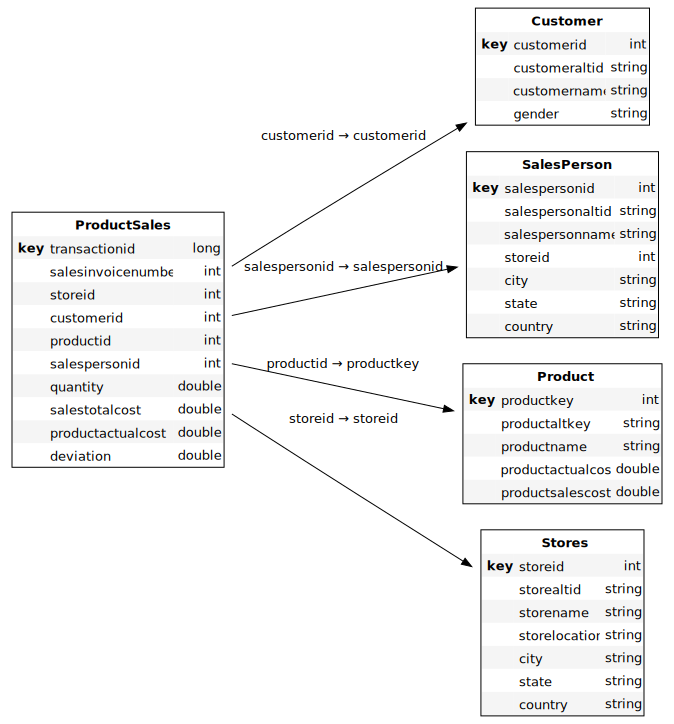

In [14]:
session.tables.schema

In [15]:
cube = session.create_cube(product_sales_table)

In [16]:
cube

In [17]:
hierarchies, levels, measures = cube.hierarchies, cube.levels, cube.measures

In [18]:
# original hierarchies
hierarchies

{('Stores', 'storename'): <atoti.hierarchy.Hierarchy object at 0x1745227d0>, ('Stores', 'state'): <atoti.hierarchy.Hierarchy object at 0x1745c9310>, ('Product', 'productname'): <atoti.hierarchy.Hierarchy object at 0x1745c8110>, ('SalesPerson', 'city'): <atoti.hierarchy.Hierarchy object at 0x1745c8d50>, ('Product', 'productaltkey'): <atoti.hierarchy.Hierarchy object at 0x1745c88d0>, ('SalesPerson', 'salespersonaltid'): <atoti.hierarchy.Hierarchy object at 0x1745c9350>, ('Stores', 'storealtid'): <atoti.hierarchy.Hierarchy object at 0x1745c2f90>, ('Stores', 'city'): <atoti.hierarchy.Hierarchy object at 0x1745c0510>, ('ProductSales', 'transactionid'): <atoti.hierarchy.Hierarchy object at 0x1745c0210>, ('Customer', 'customername'): <atoti.hierarchy.Hierarchy object at 0x1745c3e90>, ('SalesPerson', 'salespersonname'): <atoti.hierarchy.Hierarchy object at 0x1745c3b90>, ('SalesPerson', 'country'): <atoti.hierarchy.Hierarchy object at 0x16bb48a90>, ('Customer', 'customeraltid'): <atoti.hierarchy.Hierarchy object at 0x1745bfc50>, ('Stores', 'storelocation'): <atoti.hierarchy.Hierarchy object at 0x1745bda10>, ('SalesPerson', 'state'): <atoti.hierarchy.Hierarchy object at 0x1745bd790>, ('Stores', 'country'): <atoti.hierarchy.Hierarchy object at 0x1745be050>, ('Customer', 'gender'): <atoti.hierarchy.Hierarchy object at 0x176b31810>}

In [19]:
# original levels
levels

In [20]:
levels

In [21]:
# dimensions
# Customer: CustomerName, Gender
# SalesPerson: SalesPersonName, City, State, Country
# Product: ProductName
# Store: StoreName, City, State

In [22]:
hierarchies["Customer"] = [levels["customername"], levels["gender"]]

In [23]:
hierarchies["Product"] = [levels["productname"]]

In [24]:
hierarchies["SalesPerson"] = [levels["salespersonname"], levels[('SalesPerson', 'city', 'city')],
                              levels[('SalesPerson', 'state', 'state')], levels[('SalesPerson', 'country', 'country')]]

In [25]:
hierarchies["Stores"] = [levels[('Stores', 'storename', 'storename')], levels[('Stores', 'city', 'city')],
                         levels[('Stores', 'state', 'state')], levels[('Stores', 'country', 'country')]]

In [26]:
hierarchies

{('Stores', 'storename'): <atoti.hierarchy.Hierarchy object at 0x174639d50>, ('Stores', 'state'): <atoti.hierarchy.Hierarchy object at 0x1746a5590>, ('Stores', 'Stores'): <atoti.hierarchy.Hierarchy object at 0x1746a5750>, ('Customer', 'Customer'): <atoti.hierarchy.Hierarchy object at 0x1746a5b50>, ('Product', 'productname'): <atoti.hierarchy.Hierarchy object at 0x1746a5dd0>, ('SalesPerson', 'city'): <atoti.hierarchy.Hierarchy object at 0x17469bf10>, ('Product', 'productaltkey'): <atoti.hierarchy.Hierarchy object at 0x17469bf50>, ('SalesPerson', 'salespersonaltid'): <atoti.hierarchy.Hierarchy object at 0x17469bc90>, ('Stores', 'storealtid'): <atoti.hierarchy.Hierarchy object at 0x17469b610>, ('Stores', 'city'): <atoti.hierarchy.Hierarchy object at 0x17469b1d0>, ('ProductSales', 'transactionid'): <atoti.hierarchy.Hierarchy object at 0x17469b110>, ('Customer', 'customername'): <atoti.hierarchy.Hierarchy object at 0x17469af50>, ('SalesPerson', 'SalesPerson'): <atoti.hierarchy.Hierarchy object at 0x17469a750>, ('SalesPerson', 'salespersonname'): <atoti.hierarchy.Hierarchy object at 0x17469a1d0>, ('SalesPerson', 'country'): <atoti.hierarchy.Hierarchy object at 0x174699d10>, ('Product', 'Product'): <atoti.hierarchy.Hierarchy object at 0x174699ad0>, ('Customer', 'customeraltid'): <atoti.hierarchy.Hierarchy object at 0x174699750>, ('Stores', 'storelocation'): <atoti.hierarchy.Hierarchy object at 0x174699890>, ('SalesPerson', 'state'): <atoti.hierarchy.Hierarchy object at 0x1746995d0>, ('Stores', 'country'): <atoti.hierarchy.Hierarchy object at 0x174698f50>, ('Customer', 'gender'): <atoti.hierarchy.Hierarchy object at 0x174698b10>}

In [27]:
# clean customer
del hierarchies[('Customer', 'customeraltid')]
del hierarchies[('Customer', 'customername')]
del hierarchies[('Customer', 'gender')]

In [28]:
# clean product
del hierarchies[('Product', 'productname')]
del hierarchies[('Product', 'productaltkey')]

In [29]:
# clean salesperson
del hierarchies[('SalesPerson', 'city')]
del hierarchies[('SalesPerson', 'salespersonname')]
del hierarchies[('SalesPerson', 'country')]
del hierarchies[('SalesPerson', 'state')]
del hierarchies[('SalesPerson', 'salespersonaltid')]

In [30]:
# clean stores
del hierarchies[('Stores', 'storename')]
del hierarchies[('Stores', 'state')]
del hierarchies[('Stores', 'country')]
del hierarchies[('Stores', 'storealtid')]
del hierarchies[('Stores', 'city')]

In [31]:
# clean product sales
del hierarchies[('ProductSales', 'transactionid')]

In [32]:
hierarchies

{('SalesPerson', 'SalesPerson'): <atoti.hierarchy.Hierarchy object at 0x17466a790>, ('Stores', 'Stores'): <atoti.hierarchy.Hierarchy object at 0x17466bc10>, ('Product', 'Product'): <atoti.hierarchy.Hierarchy object at 0x17466f210>, ('Customer', 'Customer'): <atoti.hierarchy.Hierarchy object at 0x17466f090>, ('Stores', 'storelocation'): <atoti.hierarchy.Hierarchy object at 0x17466e250>}

In [33]:
# clean measures
del measures["contributors.COUNT"]
del measures["customerid.MEAN"]
del measures["customerid.SUM"]
del measures["deviation.MEAN"]
del measures["deviation.SUM"]
del measures["productactualcost.MEAN"]
del measures["productid.MEAN"]
del measures["productid.SUM"]
del measures["salesinvoicenumber.MEAN"]
del measures["salesinvoicenumber.SUM"]
del measures["salespersonid.MEAN"]
del measures["salespersonid.SUM"]
del measures["storeid.MEAN"]
del measures["storeid.SUM"]
del measures["salestotalcost.MEAN"]
del measures["quantity.MEAN"]

In [34]:
measures

{'update.TIMESTAMP': <atoti.measure.Measure object at 0x174674650>, 'quantity.SUM': <atoti.measure.Measure object at 0x174674f10>, 'salestotalcost.SUM': <atoti.measure.Measure object at 0x174674dd0>, 'productactualcost.SUM': <atoti.measure.Measure object at 0x174677950>}

In [35]:
cube.query(measures["quantity.SUM"], levels=[levels[('Stores', 'Stores', 'city')]])

,,quantity.SUM
storename,city,
X-Mart,Ahmedabad,43.00


In [36]:
cost = tt.agg.sum(
    measures["quantity.SUM"] * tt.agg.single_value(product_table["productactualcost"]),
    scope=tt.OriginScope(levels["productname"]),
)

income = tt.agg.sum(
    measures["quantity.SUM"] * tt.agg.single_value(product_table["productsalescost"]),
    scope=tt.OriginScope(levels["productname"]),
)


In [37]:
measures["Margin"] = income - cost

In [38]:
cube.query(measures["Margin"], levels=[levels[('Product', 'Product', 'productname')]])

,Margin
productname,
Arial Washing Powder 1kg,12.00
Nirma Soap,36.00
Rice Grains 1kg,12.00
SunFlower Oil 1 ltr,10.50
Wheat Floor 1kg,7.00


## Presentation

In [39]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

In [40]:
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## What-if Analysis

In [41]:
import pandas as pd
from sqlalchemy import create_engine

In [42]:
connection_url = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create the engine
engine = create_engine(connection_url)

In [43]:
product_df = pd.read_sql_query("SELECT * FROM dimproduct", engine)

In [44]:
product_df

,productkey,productaltkey,productname,productactualcost,productsalescost
0,1,ITM-001,Wheat Floor 1kg,5.5,6.5
1,2,ITM-002,Rice Grains 1kg,22.5,24.0
2,3,ITM-003,SunFlower Oil 1 ltr,42.0,43.5
3,4,ITM-004,Nirma Soap,18.0,20.0
4,5,ITM-005,Arial Washing Powder 1kg,135.0,139.0


In [45]:
better_actual_cost = {
    "ITM-001": 4.5,
    "ITM-002": 10,
    "ITM-003": 30,
    "ITM-004": 15,
    "ITM-005": 135,
}

In [46]:
for product, actual_cost in better_actual_cost.items():
    product_df.loc[
        product_df["productaltkey"] == product, "productactualcost"
    ] = actual_cost
product_df

,productkey,productaltkey,productname,productactualcost,productsalescost
0,1,ITM-001,Wheat Floor 1kg,4.5,6.5
1,2,ITM-002,Rice Grains 1kg,10.0,24.0
2,3,ITM-003,SunFlower Oil 1 ltr,30.0,43.5
3,4,ITM-004,Nirma Soap,15.0,20.0
4,5,ITM-005,Arial Washing Powder 1kg,135.0,139.0


In [47]:
product_table.scenarios["Lower actual cost"].load_pandas(product_df)